# **CAPSTONE MODUL 3 : CALIFORNIA HOUSING PRICE**

### **The California Real Estate Landscape**

The real estate market in California during the early 1990s was influenced by rapid population growth, urban development, and evolving economic conditions. Housing demand was high in many areas, especially in inland and suburban regions where land was more affordable and available for new development. Meanwhile, coastal cities such as San Francisco and Los Angeles remained high value markets due to location advantages and limited space for expansion.

Affordability concerns were already emerging at that time, with median household incomes struggling to keep up with rising housing prices. Regulatory constraints, land scarcity, and infrastructure development also played key roles in shaping housing supply.

This project uses data collected in 1990 to explore the relationships between location, demographics, and property values during that period.

### **Exploring Market Patterns Through Data and Technology**

Although the dataset reflects housing conditions in 1990, it remains highly valuable as a case study for applying machine learning to real estate problems. By analyzing historical data, we can better understand the key drivers of property value, such as household income, population density, proximity to the ocean, and housing age.

This retrospective analysis also provides a foundation for developing predictive models that can be further refined with modern datasets. In a broader sense, it shows how data driven insights have long been useful in informing business and investment decisions within the property sector.

### **Project Objective and Business Relevance**

The goal of this project is to build a machine learning model that predicts median house values based on 1990 California housing data. Using features like median income, total rooms, geographical location, and ocean proximity, the model aims to identify patterns that influenced housing prices at the time.

**Although the data is historical, the insights from this analysis can support the Business Intelligence or Strategic Research Division of a property company in:**

    - Understanding historical price dynamics and regional disparities
    - Establishing baseline models that can be trained further with current data
    - Exploring how socioeconomic and geographical variables have consistently impacted property value over time

By applying modern data science techniques to historical data, this project demonstrates the long standing relevance of predictive modeling in the real estate industry.

In [929]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## **1. Load Dataset**

In [930]:
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [931]:
df.shape

(14448, 10)

## **2. Data Understanding**

### **Feature Description**

1. longtitude : Geographical coordinate representing the east-west position of a housing block (in degrees).
2. latitude : Geographical coordinate representing the north-south position of a housing block (in degrees).
3. housing_median_age : Median age of the houses within the block; an indicator of how old the properties are.
4. total_rooms : Total number of rooms (all types) in all houses within a housing block.
5. total_bedrooms: Total number of bedrooms in all houses within a housing block.
6. population : Total number of people residing within the housing block.
7. households : Total number of households (i.e., groups of people living in one housing unit) in the block.
8. median_income : Median income of households within the block, measured in tens of thousands of US dollars
9. ocean_proximity : Categorical variable indicating the proximity of the housing block to the ocean. Possible values include:
    - INLAND: Far from ocean or bay.
    - <1H OCEAN: Less than one hour from the ocean
    - NEAR OCEAN: Close to the ocean
    - NEAR BAY: Close to a bay
    - ISLAND: On an island
10. median_house_value : Median house value in the block, measured in US dollars. This is the target variable for prediction.

Feature Engineering:
1. rooms_per_household (total_rooms/households): Represents the average number of rooms available per household in a given area. This feature helps indicate housing spaciousness and can reflect overall living quality.
2. bedrooms_per_room (total_bedrooms/total_rooms) : Measures the proportion of bedrooms to total rooms. Lower values may suggest more diverse use of space (e.g., living rooms, offices), which can be associated with higher property value.
3. population_per_household (population/households) : Indicates the average number of people living in each household. It serves as a proxy for housing density and may influence demand, crowding, or affordability in a region.
4. - people_per_room (population/total_rooms) : Indicates housing density by measuring the average number of people per room. Higher values may suggest overcrowding.

In [932]:
hasil = []

for col in df.columns:
    value = df[col].unique()
    hasil.append({
        'kolom' : col,
        'Jumlah_value' : df[col].nunique(),
        'value' : value
    })

hasil_df = pd.DataFrame(hasil)
pd.set_option('display.max_colwidth', None)
hasil_df

,kolom,Jumlah_value,value
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]"
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]"
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 34.0, 7.0, 13.0, 22.0, 49.0, 26.0, 40.0, 3.0, 30.0, 39.0, 23.0, 46.0, 51.0, 47.0, 48.0, 28.0, 19.0, 37.0, 36.0, 2.0, 8.0, 45.0, 1.0]"
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 777.0, 1519.0, 4334.0, 1335.0, 2195.0, 1476.0, 4424.0, 10223.0, 2519.0, 2548.0, 1508.0, 1903.0, 2363.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 3549.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 1732.0, 5817.0, 2151.0, 2695.0, 2261.0, 564.0, 4280.0, 1072.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, ...]"
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 188.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0, 352.0, 681.0, 1003.0, 246.0, 451.0, 589.0, 439.0, 148.0, 388.0, 296.0, 414.0, 217.0, 834.0, 1491.0, 581.0, 646.0, 278.0, 469.0, 604.0, 516.0, 410.0, 277.0, 1507.0, 570.0, 645.0, 221.0, 807.0, 944.0, 1031.0, 933.0, 481.0, 460.0, 707.0, 360.0, 284.0, 868.0, 664.0, 535.0, 1459.0, 372.0, 611.0, 484.0, 358.0, 477.0, 1603.0, 339.0, 488.0, 305.0, 878.0, 96.0, 673.0, nan, 597.0, 390.0, 554.0, 875.0, 202.0, 712.0, 144.0, 448.0, 1432.0, 764.0, 706.0, 404.0, 241.0, 279.0, 732.0, 566.0, 226.0, 462.0, ...]"
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0, 1734.0, 1586.0, 2719.0, 611.0, 1777.0, 1373.0, 930.0, 362.0, 1203.0, 635.0, 1360.0, 613.0, 1915.0, 5205.0, 2094.0, 755.0, 1138.0, 1882.0, 1558.0, 1849.0, 1408.0, 737.0, 3237.0, 1806.0, 1796.0, 789.0, 3163.0, 2336.0,

In [933]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [934]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [935]:
df.duplicated().sum()

0

<Axes: xlabel='median_house_value', ylabel='Count'>

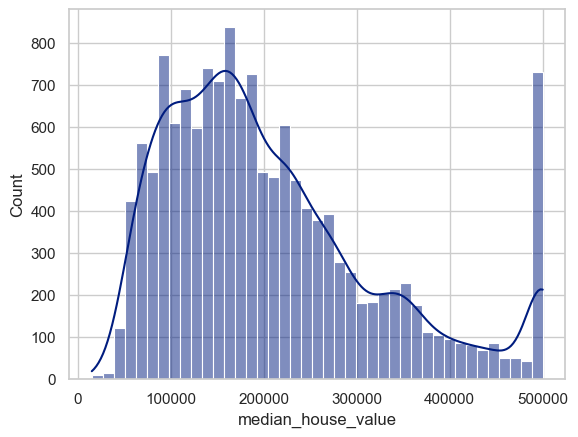

In [936]:
sns.histplot(data=df, x='median_house_value', kde=True)

In [937]:
df['median_house_value'].describe()

count     14448.000000
mean     206824.624516
std      115365.476182
min       14999.000000
25%      119600.000000
50%      180000.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

## **3. EDA**

In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [939]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [940]:
feature_num = [feature for feature in df.columns if (df[feature].dtype == 'float64')]
feature_num = feature_num[2:8]

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

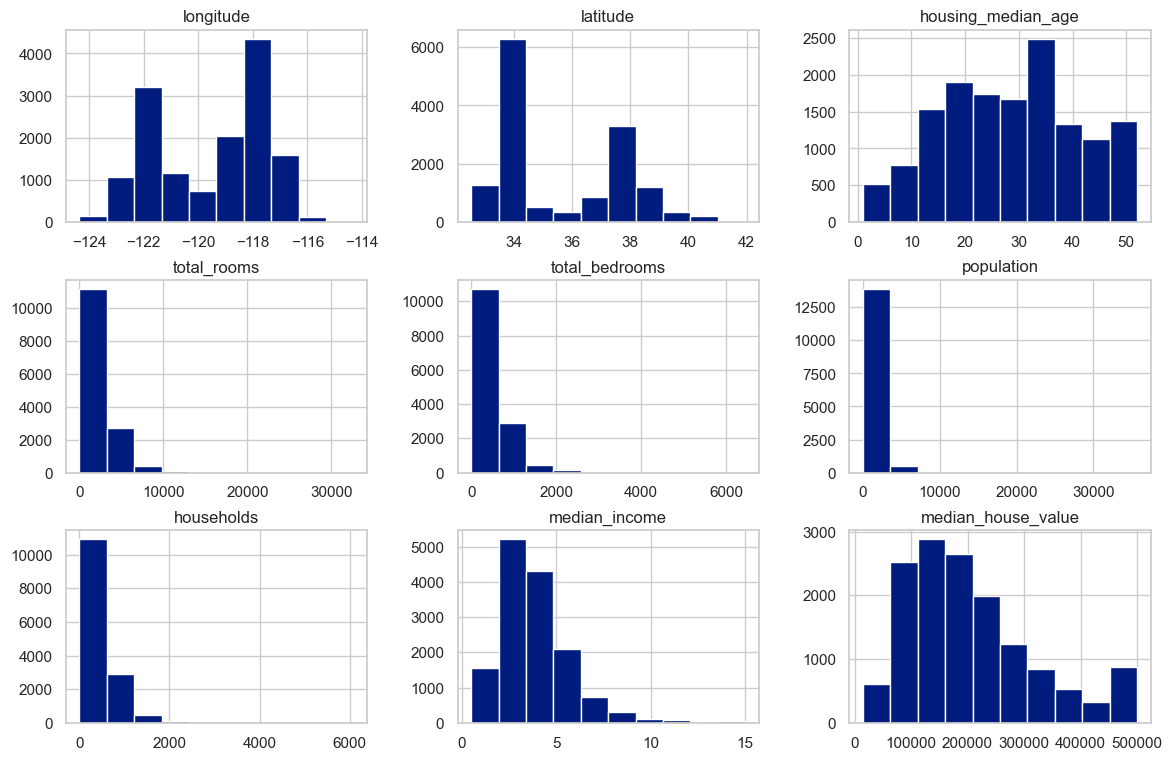

In [941]:
df.hist(figsize=(14, 9))

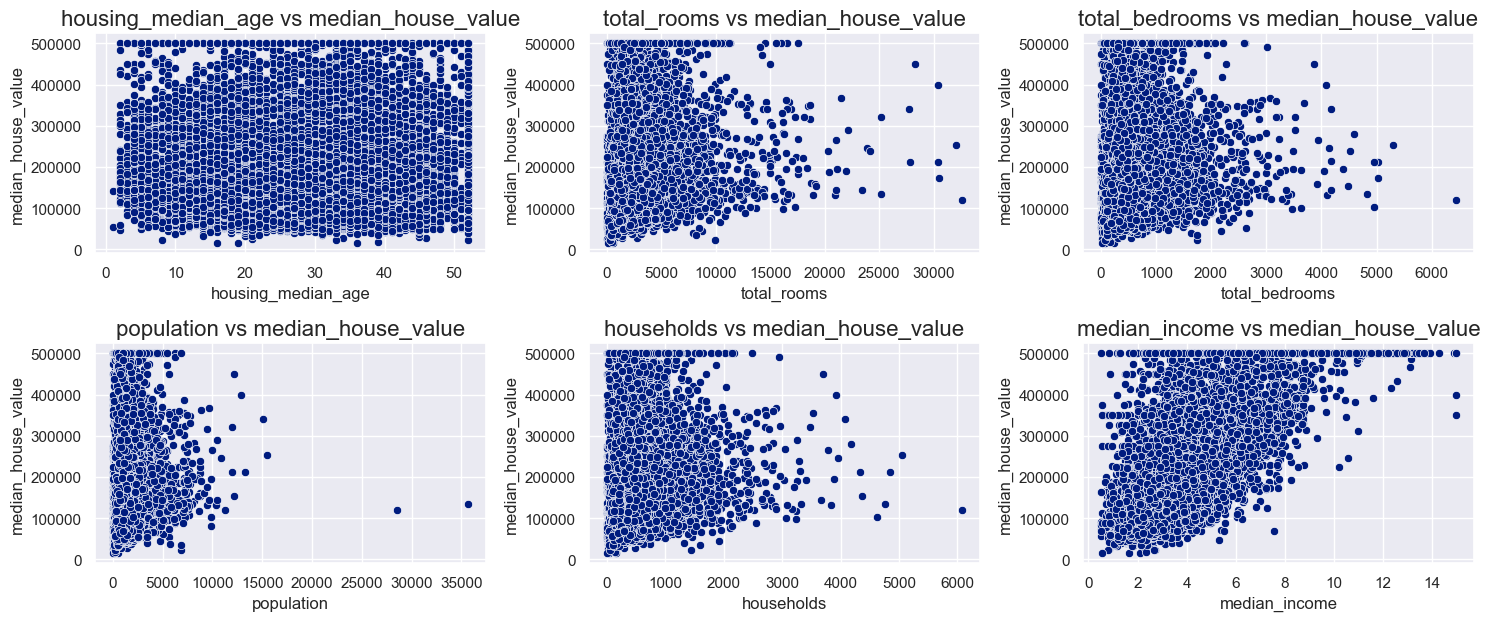

In [942]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(palette='dark')
plotnumber = 1
    
for feature in feature_num:
    ax = plt.subplot(3,3, plotnumber)
    sns.scatterplot(x=feature, y='median_house_value', data=df);
    plt.title(f'{feature} vs median_house_value', fontsize=16)
    plt.tight_layout()
    plotnumber += 1

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

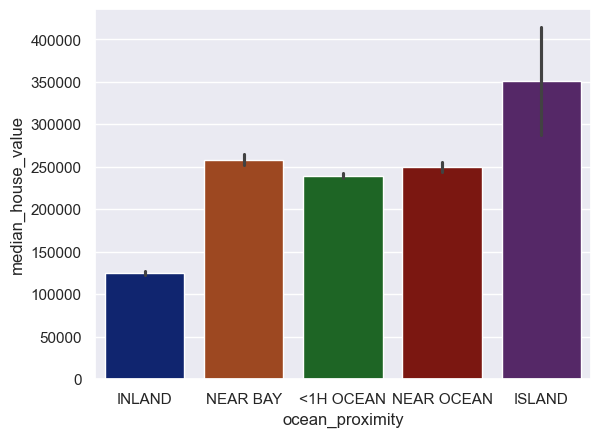

In [943]:
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', palette='dark')

In [944]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

In [945]:
pd.pivot_table(data=df, index='ocean_proximity', values='median_house_value', aggfunc='median').join(df['ocean_proximity'].value_counts())

,median_house_value,count
ocean_proximity,,
<1H OCEAN,214800.0,6369
INLAND,108800.0,4576
ISLAND,351100.0,2
NEAR BAY,230800.0,1622
NEAR OCEAN,228600.0,1879


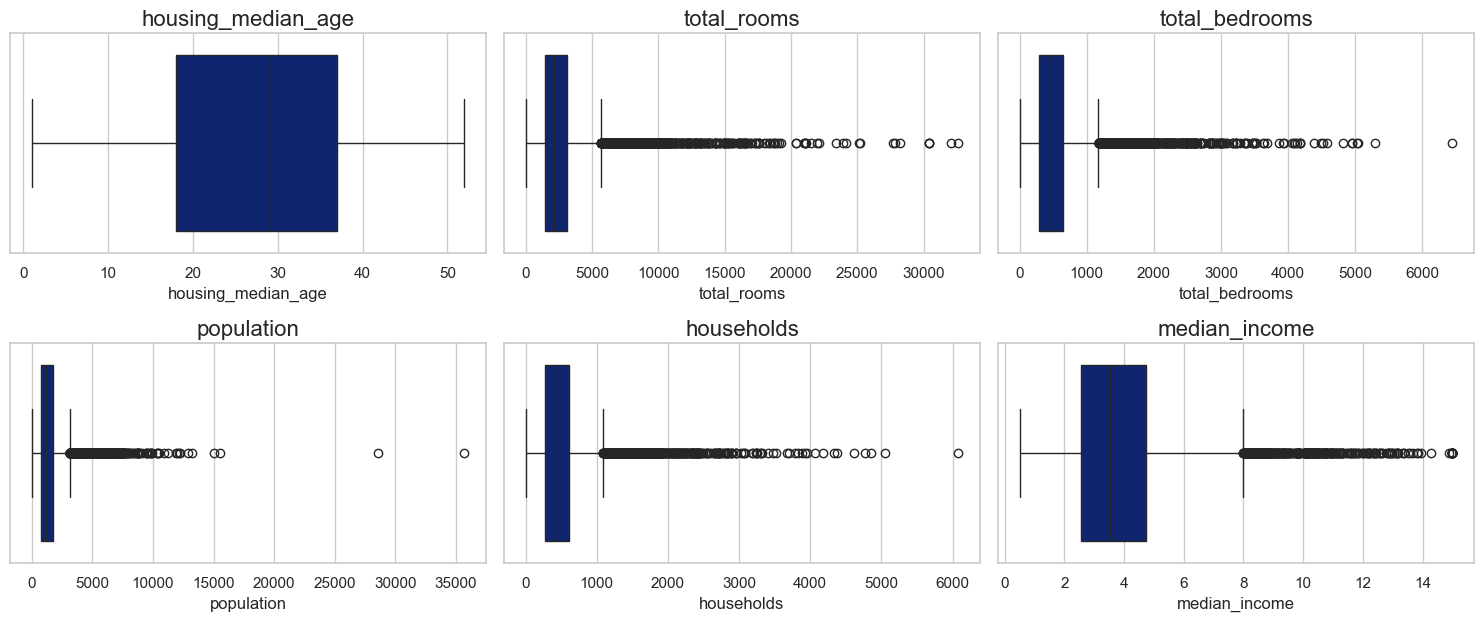

In [946]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='dark')
plotnumber = 1
    
for feature in feature_num:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

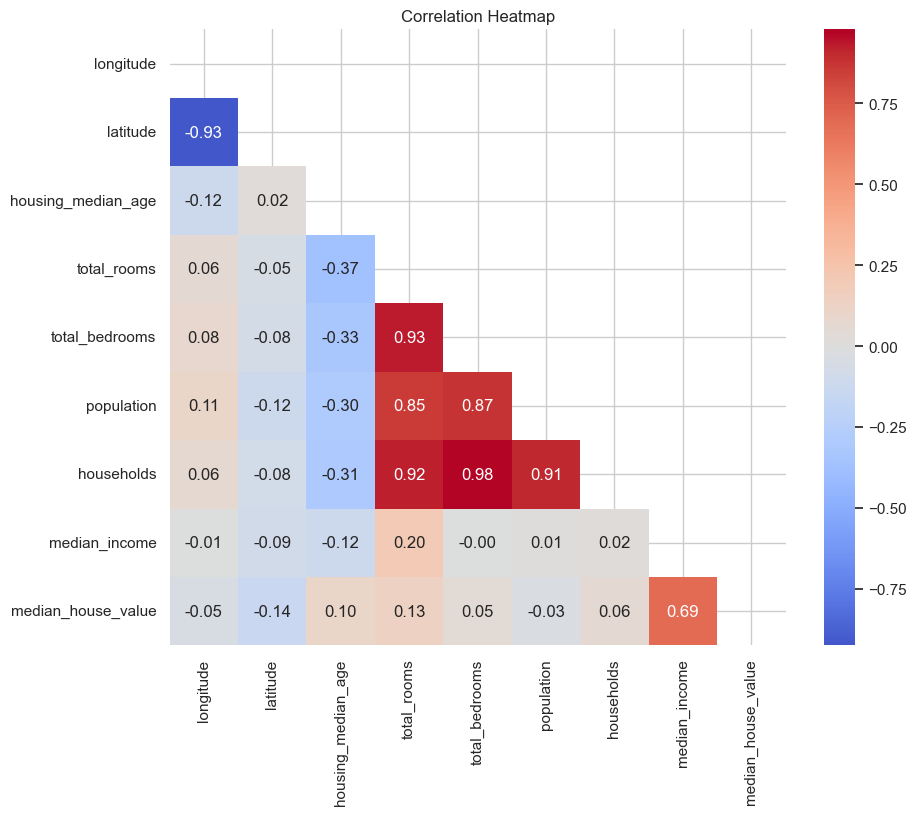

In [947]:
corr = df.corr(numeric_only=True) # dataframe korelasi
mask = np.triu(np.ones_like(corr, dtype=bool)) # mask segitiga atas

plt.figure(figsize=(10,8))
sns.heatmap(corr,mask=mask, annot=True, cmap='coolwarm', fmt='.2f', square=True, center=0)
plt.title('Correlation Heatmap')
plt.show()

## **4. Preprocessing**

In [948]:
df_clean = df.copy()

In [949]:
df_clean.reset_index(inplace=True)

In [950]:
df_clean.drop(columns='index', axis=0, inplace=True)

<Axes: xlabel='latitude', ylabel='longitude'>

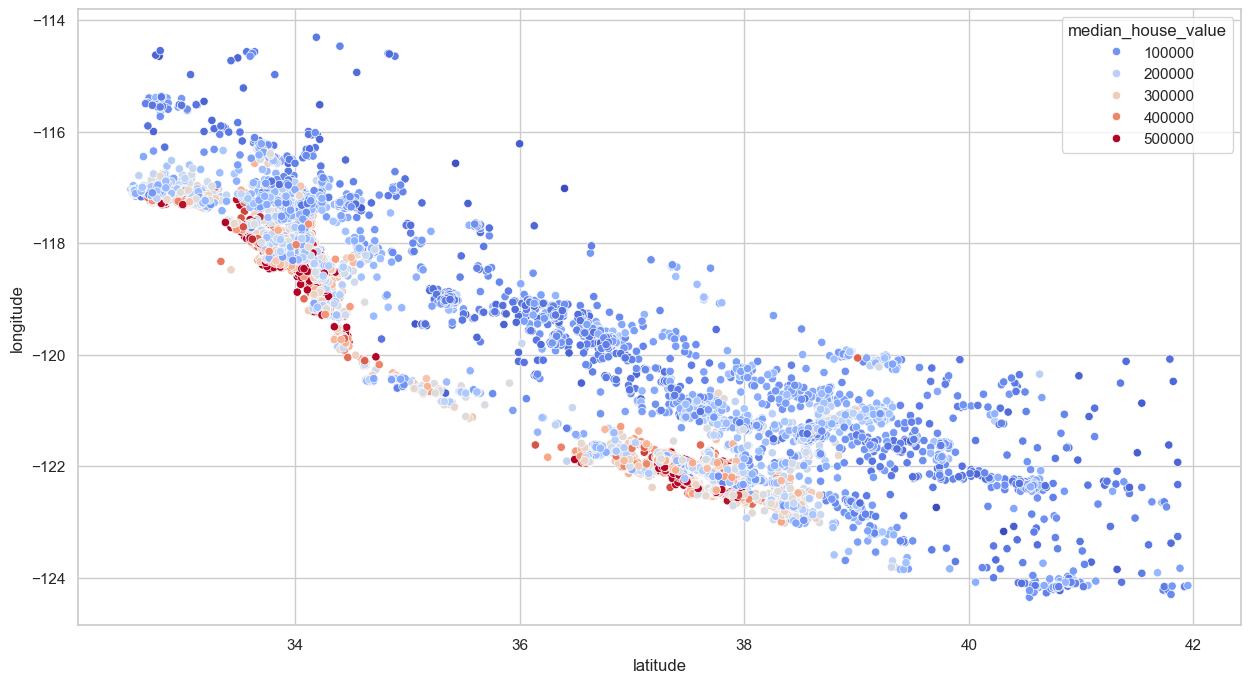

In [951]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_clean, x='latitude', y='longitude', hue='median_house_value', palette='coolwarm')

### **Feature Engineering**

- bedrooms_per_room : Measures the proportion of bedrooms to total rooms. Lower values may suggest more diverse use of space (e.g., living rooms, offices), which can be associated with higher property value.
- rooms_per_household : Represents the average number of rooms available per household in a given area. This feature helps indicate housing spaciousness and can reflect overall living quality.
- population_per_household : Indicates the average number of people living in each household. It serves as a proxy for housing density and may influence demand, crowding, or affordability in a region.
- geo_clusters : a feature that groups houses based on their geographic location using KMeans clustering on latitude and longitude.
- people_per_room : Indicates housing density by measuring the average number of people per room. Higher values may suggest overcrowding.
- income_per_household : Indicates the average income of household.

In [952]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [953]:
# Feature Engineering
df_clean['bedrooms_per_room'] = df_clean['total_bedrooms'] / df_clean['total_rooms']
df_clean['rooms_per_household'] = df_clean['total_rooms']/df_clean['households']
df_clean['population_per_household'] = df_clean['population'] / df_clean['households']
df_clean['people_per_room'] = df_clean['population'] / df_clean['total_rooms']
df_clean['income_per_household'] = df_clean['median_income'] / df_clean['households']

In [954]:
df_clean['people_per_room'].describe()

count    14448.000000
mean         0.604473
std          1.138001
min          0.018109
25%          0.435658
50%          0.515123
75%          0.655180
max        116.611111
Name: people_per_room, dtype: float64

<Axes: xlabel='people_per_room'>

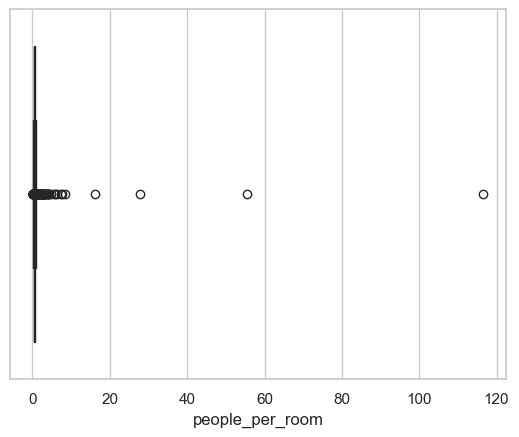

In [955]:
sns.boxplot(data=df_clean, x='people_per_room')

In [956]:
df_clean = df_clean[df_clean['people_per_room'] < 16]

In [957]:
location_prop = df_clean[['latitude', 'longitude']]

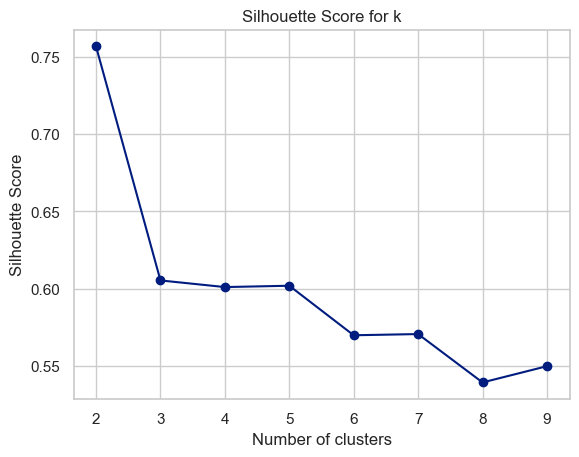

In [958]:
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(location_prop)
    score = silhouette_score(location_prop, labels)
    sil_scores.append(score)

plt.plot(range(2,10), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for k')
plt.show()

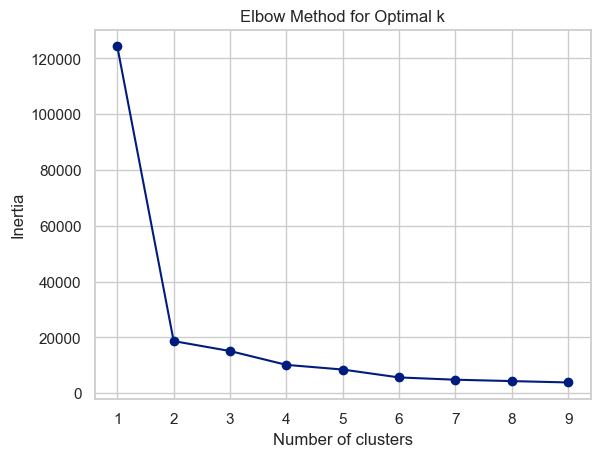

In [959]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(location_prop)  # atau fitur yang kamu pakai
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['geo_clusters'] = kmeans.fit_predict(location_prop)

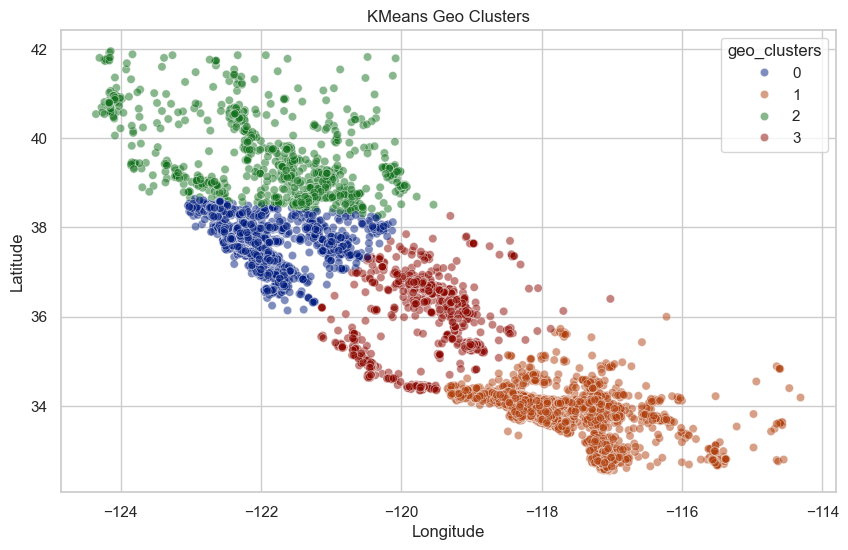

In [961]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='longitude', y='latitude', hue='geo_clusters', palette='dark', alpha=0.5)
plt.title('KMeans Geo Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

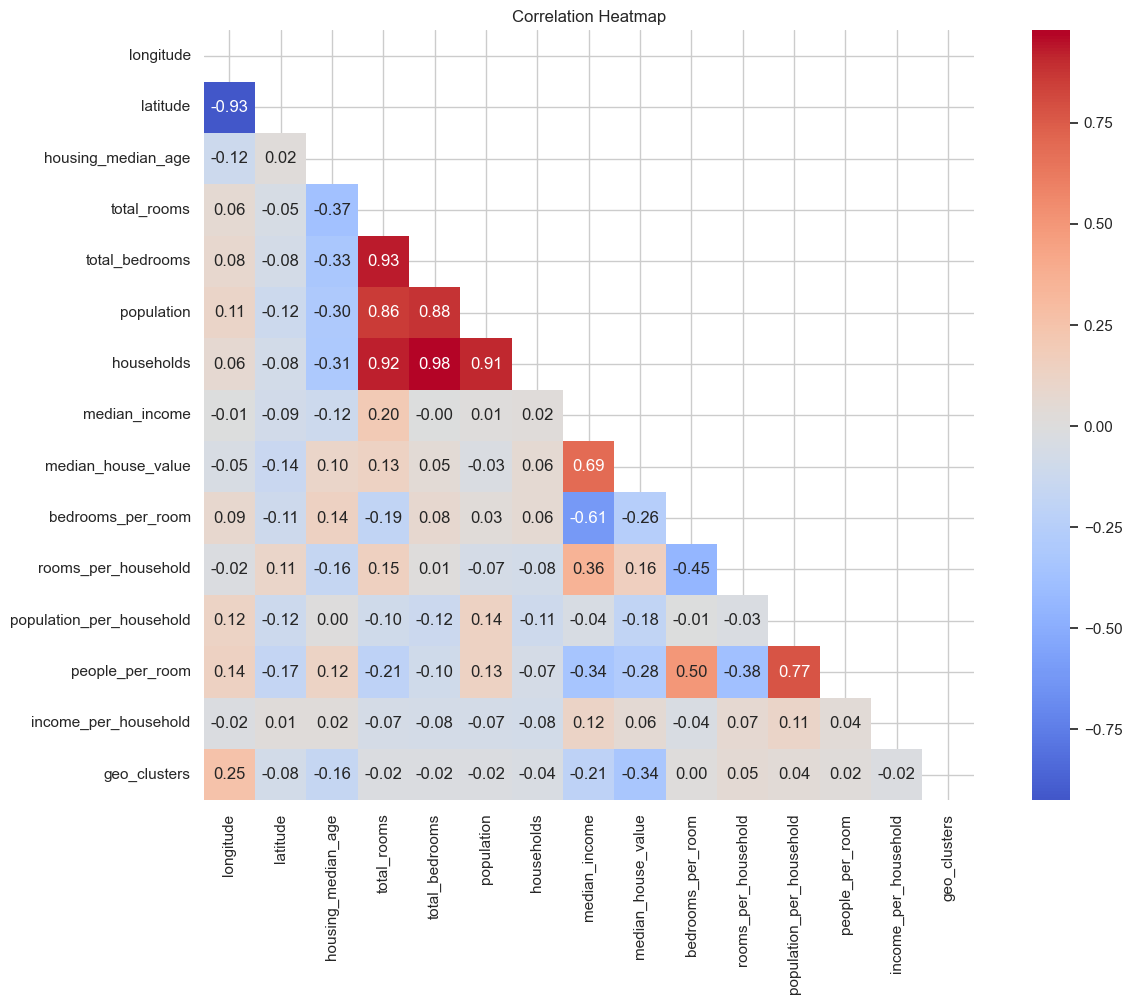

In [962]:
corr = df_clean.corr(numeric_only=True) # dataframe korelasi
mask = np.triu(np.ones_like(corr, dtype=bool)) # mask segitiga atas

plt.figure(figsize=(15,10))
sns.heatmap(corr,mask=mask, annot=True, cmap='coolwarm', fmt='.2f', square=True, center=0)
plt.title('Correlation Heatmap')
plt.show()

### **Define X, y**

In [963]:
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedrooms_per_room,rooms_per_household,population_per_household,people_per_room,income_per_household,geo_clusters
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,0.250000,2.800000,4.825000,1.723214,0.049375,3
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,0.322517,3.671480,3.018051,0.822026,0.008160,0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,0.167939,6.478022,3.810440,0.588210,0.017305,1
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,0.474980,2.518000,3.051000,1.211676,0.001720,1
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,0.251295,4.622754,3.628743,0.784974,0.013297,3


In [964]:
df_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household,population_per_household,people_per_room,income_per_household,geo_clusters
count,14444.000000,14444.000000,14444.000000,14444.000000,14307.000000,14444.000000,14444.000000,14444.000000,14444.000000,14307.000000,14444.000000,14444.000000,14444.000000,14444.000000,14444.000000
mean,-119.566461,35.629652,28.617004,2640.799294,538.399525,1423.742384,499.636597,3.866343,206826.715245,0.212904,5.422993,2.943359,0.589685,0.015969,0.995361
std,2.006767,2.139872,12.594423,2191.547423,423.554967,1146.278598,383.074040,1.891270,115368.557485,0.058192,2.287608,1.113344,0.296136,0.136614,0.850473
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.846154,0.750000,0.018109,0.000380,0.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570300,119600.000000,0.175575,4.452055,2.427208,0.435632,0.005038,0.000000
50%,-118.490000,34.260000,29.000000,2125.500000,435.000000,1165.000000,410.000000,3.538650,180000.000000,0.202886,5.229318,2.816196,0.515007,0.008447,1.000000
75%,-118.000000,37.710000,37.000000,3148.250000,647.500000,1723.000000,604.000000,4.735800,263900.000000,0.239191,6.047619,3.280111,0.655097,0.014072,1.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,132.533333,63.750000,8.388158,15.000100,3.000000


In [965]:
df_clean['geo_clusters'].value_counts()

geo_clusters
1    7738
0    4010
2    1449
3    1247
Name: count, dtype: int64

In [966]:
df_clean['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4573
NEAR OCEAN    1878
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

In [967]:
df_clean = df_clean[df_clean['ocean_proximity'] != 'ISLAND']

In [968]:
df_clean['median_house_value'].describe()

count     14442.000000
mean     206806.735563
std      115361.623026
min       14999.000000
25%      119600.000000
50%      179950.000000
75%      263800.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [969]:
X = df_clean.drop(columns=['longitude', 'latitude', 'median_house_value'])
y = df_clean['median_house_value']

In [970]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14442 entries, 0 to 14447
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        14442 non-null  float64
 1   total_rooms               14442 non-null  float64
 2   total_bedrooms            14305 non-null  float64
 3   population                14442 non-null  float64
 4   households                14442 non-null  float64
 5   median_income             14442 non-null  float64
 6   ocean_proximity           14442 non-null  object 
 7   bedrooms_per_room         14305 non-null  float64
 8   rooms_per_household       14442 non-null  float64
 9   population_per_household  14442 non-null  float64
 10  people_per_room           14442 non-null  float64
 11  income_per_household      14442 non-null  float64
 12  geo_clusters              14442 non-null  int32  
dtypes: float64(11), int32(1), object(1)
memory usage: 1.5+ MB


### **Splitting**

In [971]:
from sklearn.model_selection import train_test_split

In [972]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [973]:
X_train.shape

(11553, 13)

In [974]:
X_test.shape

(2889, 13)

In [975]:
y_train.shape

(11553,)

In [976]:
y_test.shape

(2889,)

### **Built the transformer**

- StandardScaler : 'housing_median_age'
- RobustScaler : 'total_rooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household', 'people_per_room', 'income_per_household'
- IterativeImp : 'total_bedrooms', 'bedrooms_per_room'
- OneHot : 'ocean_proximity', 'geo_clusters'

In [977]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

In [978]:
pipe_iter_robs = Pipeline([
    ('impute', IterativeImputer()),
    ('robust', RobustScaler())
])

In [979]:
transformer = ColumnTransformer([
    ('pipe_iter_robs', pipe_iter_robs, ['total_rooms', 'population', 'households', 'median_income', 'rooms_per_household', 'total_bedrooms', 'bedrooms_per_room', 'population_per_household', 'people_per_room', 'income_per_household']),
    ('standard', StandardScaler(), ['housing_median_age']),
    ('onehot', OneHotEncoder(), ['ocean_proximity', 'geo_clusters'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_robs',
                                 Pipeline(steps=[('impute', IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['total_rooms', 'population', 'households',
                                  'median_income', 'rooms_per_household',
                                  'total_bedrooms', 'bedrooms_per_room',
                                  'population_per_household', 'people_per_room',
                                  'income_per_household']),
                                ('standard', StandardScaler(),
                                 ['housing_median_age']),
                                ('onehot', OneHotEncoder(),
                                 ['ocean_proximity', 'geo_clusters'])])

## **5. Cross Validation**

In [980]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

# Ensemble
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import cross_validate, cross_val_score

In [981]:
lasso = Lasso()
linreg = LinearRegression()
ridge = Ridge()
dectree = DecisionTreeRegressor()
ranfor = RandomForestRegressor()
ada = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
extree = ExtraTreesRegressor()
xgb = XGBRegressor()

voting = VotingRegressor(estimators=[('clf1', linreg),
                                     ('clf2', lasso),
                                     ('clf3', ridge),
                                     ('clf4', dectree)])

stacking = StackingRegressor(estimators=[('clf1', linreg),
                                     ('clf2', lasso),
                                     ('clf3', ridge),
                                     ('clf4', dectree)],
                                     final_estimator=LinearRegression())


In [982]:
list_scorer = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']
list_model = [lasso, linreg, ridge, dectree, ranfor, ada, gbr, extree, xgb, voting, stacking]

# rmse
list_mean_rmse = []
list_std_rmse = []
list_kosong = []
# mae
list_mean_mae = []
list_std_mae = []
# mape
list_mean_mape = []
list_std_mape = []

for i in list_model:
    pipe_prep_model1 = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    crossval = cross_validate(estimator=pipe_prep_model1,
                              X= X_train,
                              y= y_train,
                              cv= 5,
                              n_jobs=-1,
                              scoring= list_scorer)
    
    list_kosong.append(crossval)
    list_mean_rmse.append(crossval['test_neg_root_mean_squared_error'].mean())
    list_std_rmse.append(crossval['test_neg_root_mean_squared_error'].std())

    list_mean_mae.append(crossval['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(crossval['test_neg_mean_absolute_error'].std())

    list_mean_mape.append(crossval['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(crossval['test_neg_mean_absolute_percentage_error'].std())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.041e+12, tolerance: 1.225e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.080e+12, tolerance: 1.236e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.069e+12, toler

In [983]:
df_hasil = pd.DataFrame()
df_hasil['model'] = ['Lasso', 'LinearRegression', 'Ridge', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor', 'ExtraTreesRegressor', 'XGBRegressor', 'voting', 'stacking']
df_hasil['mean_rmse'] = list_mean_rmse
df_hasil['std_rmse'] = list_std_rmse
df_hasil['mean_mae'] = list_mean_mae
df_hasil['std_mae'] = list_std_mae
df_hasil['mean_mape'] = list_mean_mape
df_hasil['std_mape'] = list_std_mape

df_hasil

,model,mean_rmse,std_rmse,mean_mae,std_mae,mean_mape,std_mape
0,Lasso,-68907.971196,1144.955754,-49364.256837,848.350791,-0.281139,0.007720
1,LinearRegression,-68907.201801,1145.927343,-49364.602307,848.519301,-0.281145,0.007718
2,Ridge,-68908.130736,1142.772354,-49364.456621,848.001065,-0.281141,0.007720
3,DecisionTreeRegressor,-82144.847062,1586.066628,-54891.095336,930.257413,-0.302691,0.004888
4,RandomForestRegressor,-57814.007963,2076.694337,-39797.955632,1083.935503,-0.223768,0.002575
5,AdaBoostRegressor,-77974.214418,3899.704564,-64335.185481,4758.218351,-0.431762,0.050487
6,GradientBoostingRegressor,-58800.339266,1799.031631,-41382.047176,829.959664,-0.232324,0.003166
7,ExtraTreesRegressor,-56326.031021,1660.326482,-38623.913193,978.553648,-0.215581,0.003497
8,XGBRegressor,-58814.933581,1579.650826,-40686.449792,652.263144,-0.227369,0.005931
9,voting,-65393.337520,1261.700684,-46522.663147,903.356201,-0.262703,0.006271


### Model Evaluation Summary

After comparing several regression algorithms using cross validation across three metrics RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error), the **ExtraTreesRegressor** emerged as the best-performing model overall.

### Key Findings:
- ExtraTreesRegressor achieved the **lowest RMSE** (-56448.73), indicating it has the smallest average squared error, which is crucial in housing price prediction.
- It also produced the **lowest MAPE** (-0.216060), which means the average percentage error is smaller compared to other models.
- Although RandomForestRegressor showed slightly better stability (lower standard deviation), ExtraTreesRegressor still maintains reliable consistency.
- Linear models (Lasso, Ridge, and LinearRegression) significantly underperformed, confirming that the relationship in the data is non-linear and better captured by ensemble-based models.

### Selected Model: `ExtraTreesRegressor`, `RandomForestRegressor`, and `GradientBoostingRegressor`

## **6. Hyperparameter Tuning**

In [984]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

### **ExtraTreesRegressor**

In [985]:
?ExtraTreesRegressor

Init signature:
ExtraTreesRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
An extra-trees regressor.

This class implements a meta estimator that fits a number of
randomized decision trees (a.k.a. extra-trees) on various sub-samples
of the dataset and uses averaging to improve the predictive accuracy
and control over-fitting.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : 

In [986]:
estimator_extree = Pipeline([
    ('preprocessing', transformer),
    ('modeling', extree)
])

hyperparam_extree = {
    'modeling__criterion': ['squared_error', 'poisson'],
    'modeling__n_estimators': range(150, 210, 10),
    'modeling__min_samples_split': range(10, 15, 1),
    'modeling__min_samples_leaf': [1],
    'modeling__max_depth': [19, 20, 21],
    'modeling__random_state': [0, 42, 100]
}

crossval_extree = KFold(n_splits=5, shuffle=True, random_state=42)

random_extree = RandomizedSearchCV(
    estimator_extree, 
    param_distributions= hyperparam_extree,
    cv = crossval_extree,
    n_iter = 20, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    verbose = 2,
    random_state=42,
    refit = 'neg_root_mean_squared_error'
)

In [987]:
random_extree.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END modeling__criterion=squared_error, modeling__max_depth=19, modeling__min_samples_leaf=1, modeling__min_samples_split=14, modeling__n_estimators=150, modeling__random_state=42; total time=   2.5s
[CV] END modeling__criterion=squared_error, modeling__max_depth=19, modeling__min_samples_leaf=1, modeling__min_samples_split=14, modeling__n_estimators=150, modeling__random_state=42; total time=   2.6s
[CV] END modeling__criterion=squared_error, modeling__max_depth=19, modeling__min_samples_leaf=1, modeling__min_samples_split=14, modeling__n_estimators=150, modeling__random_state=42; total time=   2.6s
[CV] END modeling__criterion=squared_error, modeling__max_depth=21, modeling__min_samples_leaf=1, modeling__min_samples_split=12, modeling__n_estimators=190, modeling__random_state=42; total time=   3.3s
[CV] END modeling__criterion=squared_error, modeling__max_depth=21, modeling__min_samples_leaf=1, modeling__min_samples_sp

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iter_robs',
                                                                               Pipeline(steps=[('impute',
                                                                                                IterativeImputer()),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['total_rooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income',
                                                                                'rooms_per_household',
                                                                                'total_bedr...
                                        'modeling__max_depth': [19, 20, 21],
                                        'modeling__min_samples_leaf': [1],
                                        'modeling__min_samples_split': range(10, 15),
                                        'modeling__n_estimators': range(150, 210, 10),
                                        'modeling__random_state': [0, 42, 100]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'],
                   verbose=2)

In [988]:
df_result_extree = pd.DataFrame(random_extree.cv_results_)
df_result_extree.sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'], ascending=True, inplace=True)
df_result_extree.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__random_state,param_modeling__n_estimators,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_depth,param_modeling__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
12,3.651322,0.058511,0.088152,0.005428,100,190,12,1,20,poisson,...,1136.139326,2,-0.216335,-0.217339,-0.210800,-0.211861,-0.210686,-0.213404,0.002850,2
0,3.324129,0.052678,0.087066,0.006486,42,190,12,1,21,squared_error,...,1087.764795,6,-0.217427,-0.217303,-0.212033,-0.212721,-0.211430,-0.214183,0.002631,13
10,2.904762,0.096347,0.077019,0.008288,0,170,10,1,19,squared_error,...,1047.859275,1,-0.216590,-0.217025,-0.211733,-0.213059,-0.211563,-0.213994,0.002359,11
14,2.940340,0.029798,0.064005,0.004122,100,150,10,1,19,poisson,...,1028.933569,5,-0.216356,-0.216922,-0.211321,-0.212103,-0.211694,-0.213679,0.002436,7
6,3.405335,0.052612,0.083325,0.006711,0,180,11,1,19,poisson,...,1045.397554,3,-0.216331,-0.216393,-0.211165,-0.212638,-0.211213,-0.213548,0.002358,4


In [989]:
random_extree.best_score_

-56059.09820804359

In [990]:
random_extree.best_params_

{'modeling__random_state': 100,
 'modeling__n_estimators': 190,
 'modeling__min_samples_split': 12,
 'modeling__min_samples_leaf': 1,
 'modeling__max_depth': 20,
 'modeling__criterion': 'poisson'}

### **RandomForest**

In [991]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [992]:
estimator_ranfor = Pipeline([
    ('preprocessing', transformer),
    ('ranfor', ranfor)
])

hyperparam_ranfor = {
    'ranfor__criterion' : ['poisson', 'friedman_mse'],
    'ranfor__n_estimators': range(150, 210, 10),
    'ranfor__min_samples_split': range(10, 15, 1),
    'ranfor__min_samples_leaf': [1],
    'ranfor__random_state': [0, 42, 80]
}

crossval_ranfor = KFold(n_splits=5, shuffle=True, random_state=42)

random_ranfor = RandomizedSearchCV(
    estimator_ranfor, 
    param_distributions= hyperparam_ranfor,
    cv = crossval_ranfor,
    n_iter = 20,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    verbose = 2,
    random_state=42,
    refit = 'neg_root_mean_squared_error'
)

In [993]:
random_ranfor.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ranfor__criterion=poisson, ranfor__min_samples_leaf=1, ranfor__min_samples_split=11, ranfor__n_estimators=150, ranfor__random_state=42; total time=  14.9s
[CV] END ranfor__criterion=poisson, ranfor__min_samples_leaf=1, ranfor__min_samples_split=11, ranfor__n_estimators=150, ranfor__random_state=42; total time=  15.1s
[CV] END ranfor__criterion=poisson, ranfor__min_samples_leaf=1, ranfor__min_samples_split=11, ranfor__n_estimators=150, ranfor__random_state=42; total time=  15.2s
[CV] END ranfor__criterion=poisson, ranfor__min_samples_leaf=1, ranfor__min_samples_split=11, ranfor__n_estimators=150, ranfor__random_state=42; total time=  15.2s
[CV] END ranfor__criterion=poisson, ranfor__min_samples_leaf=1, ranfor__min_samples_split=11, ranfor__n_estimators=150, ranfor__random_state=42; total time=  15.5s
[CV] END ranfor__criterion=poisson, ranfor__min_samples_leaf=1, ranfor__min_samples_split=12, ranfor__n_estimators=170

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iter_robs',
                                                                               Pipeline(steps=[('impute',
                                                                                                IterativeImputer()),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['total_rooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income',
                                                                                'rooms_per_household',
                                                                                'total_bedr...
                   param_distributions={'ranfor__criterion': ['poisson',
                                                              'friedman_mse'],
                                        'ranfor__min_samples_leaf': [1],
                                        'ranfor__min_samples_split': range(10, 15),
                                        'ranfor__n_estimators': range(150, 210, 10),
                                        'ranfor__random_state': [0, 42, 80]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'],
                   verbose=2)

In [994]:
random_ranfor.best_score_

-57663.03911438219

In [995]:
random_ranfor.best_params_

{'ranfor__random_state': 0,
 'ranfor__n_estimators': 200,
 'ranfor__min_samples_split': 13,
 'ranfor__min_samples_leaf': 1,
 'ranfor__criterion': 'poisson'}

In [996]:
df_result_ranfor = pd.DataFrame(random_ranfor.cv_results_)
df_result_ranfor.sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'], ascending=True, inplace=True)
df_result_ranfor.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ranfor__random_state,param_ranfor__n_estimators,param_ranfor__min_samples_split,param_ranfor__min_samples_leaf,param_ranfor__criterion,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
12,19.395324,0.234524,0.093890,0.007806,0,200,13,1,poisson,"{'ranfor__random_state': 0, 'ranfor__n_estimators': 200, 'ranfor__min_samples_split': 13, 'ranfor__min_samples_leaf': 1, 'ranfor__criterion': 'poisson'}",...,1046.307683,4,-0.221972,-0.223194,-0.221050,-0.219972,-0.217582,-0.220754,0.001908,5
0,15.058422,0.198185,0.112696,0.039892,42,150,11,1,poisson,"{'ranfor__random_state': 42, 'ranfor__n_estimators': 150, 'ranfor__min_samples_split': 11, 'ranfor__min_samples_leaf': 1, 'ranfor__criterion': 'poisson'}",...,1022.579571,1,-0.221533,-0.222757,-0.221679,-0.218923,-0.217560,-0.220491,0.001933,1
15,19.905643,0.130591,0.094997,0.014251,42,200,10,1,poisson,"{'ranfor__random_state': 42, 'ranfor__n_estimators': 200, 'ranfor__min_samples_split': 10, 'ranfor__min_samples_leaf': 1, 'ranfor__criterion': 'poisson'}",...,1017.660547,2,-0.221895,-0.223002,-0.221401,-0.218970,-0.217691,-0.220592,0.001960,2
16,19.251299,0.034923,0.092907,0.007660,0,200,12,1,poisson,"{'ranfor__random_state': 0, 'ranfor__n_estimators': 200, 'ranfor__min_samples_split': 12, 'ranfor__min_samples_leaf': 1, 'ranfor__criterion': 'poisson'}",...,1038.940341,5,-0.221958,-0.223048,-0.221356,-0.219954,-0.217688,-0.220801,0.001849,6
7,18.302159,0.224036,0.088749,0.009495,80,190,13,1,poisson,"{'ranfor__random_state': 80, 'ranfor__n_estimators': 190, 'ranfor__min_samples_split': 13, 'ranfor__min_samples_leaf': 1, 'ranfor__criterion': 'poisson'}",...,1069.773107,9,-0.222586,-0.223802,-0.221272,-0.219501,-0.217564,-0.220945,0.002213,9


### **GradientBoostingRegressor**

In [997]:
?GradientBoostingRegressor

Init signature:
GradientBoostingRegressor(
    *,
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`~sklearn.ensemble.HistGradientBoostingRegressor` is a much faster variant
of this algorithm for intermediate and large datasets (`n_samples >= 10_000`) and
supports mon

In [998]:
estimator_gbr = Pipeline([
    ('preprocessing', transformer),
    ('gbr', gbr)
])

hyperparam_gbr = {
    'gbr__criterion' : ['friedman_mse', 'squared_error'],
    'gbr__loss' : ['squared_error', 'huber'],
    'gbr__n_estimators': range(190, 200, 2),
    'gbr__min_samples_split': range(10, 15, 1),
    'gbr__min_samples_leaf': [1],
    'gbr__alpha': [0.7, 0.8, 0.9],
    'gbr__random_state': [0, 42, 100]
}

crossval_gbr = KFold(n_splits=5, shuffle=True, random_state=42)

random_gbr = RandomizedSearchCV(
    estimator_gbr, 
    param_distributions= hyperparam_gbr,
    cv = crossval_gbr,
    n_iter = 20,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    verbose = 2,
    random_state=42,
    refit = 'neg_root_mean_squared_error'
)

In [999]:
random_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END gbr__alpha=0.7, gbr__criterion=friedman_mse, gbr__loss=squared_error, gbr__min_samples_leaf=1, gbr__min_samples_split=14, gbr__n_estimators=196, gbr__random_state=42; total time=   7.1s
[CV] END gbr__alpha=0.7, gbr__criterion=friedman_mse, gbr__loss=squared_error, gbr__min_samples_leaf=1, gbr__min_samples_split=14, gbr__n_estimators=196, gbr__random_state=42; total time=   7.2s
[CV] END gbr__alpha=0.7, gbr__criterion=friedman_mse, gbr__loss=squared_error, gbr__min_samples_leaf=1, gbr__min_samples_split=14, gbr__n_estimators=196, gbr__random_state=42; total time=   7.4s
[CV] END gbr__alpha=0.7, gbr__criterion=friedman_mse, gbr__loss=squared_error, gbr__min_samples_leaf=1, gbr__min_samples_split=14, gbr__n_estimators=196, gbr__random_state=42; total time=   7.4s
[CV] END gbr__alpha=0.9, gbr__criterion=squared_error, gbr__loss=huber, gbr__min_samples_leaf=1, gbr__min_samples_split=10, gbr__n_estimators=190, gbr__random

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iter_robs',
                                                                               Pipeline(steps=[('impute',
                                                                                                IterativeImputer()),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['total_rooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income',
                                                                                'rooms_per_household',
                                                                                'total_bedr...
                                                           'squared_error'],
                                        'gbr__loss': ['squared_error', 'huber'],
                                        'gbr__min_samples_leaf': [1],
                                        'gbr__min_samples_split': range(10, 15),
                                        'gbr__n_estimators': range(190, 200, 2),
                                        'gbr__random_state': [0, 42, 100]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'],
                   verbose=2)

In [1000]:
random_gbr.best_params_

{'gbr__random_state': 100,
 'gbr__n_estimators': 196,
 'gbr__min_samples_split': 13,
 'gbr__min_samples_leaf': 1,
 'gbr__loss': 'huber',
 'gbr__criterion': 'friedman_mse',
 'gbr__alpha': 0.9}

In [1001]:
random_gbr.best_score_

-58266.93690680107

In [1002]:
df_result_gbr = pd.DataFrame(random_gbr.cv_results_)
df_result_gbr.sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'], ascending=True, inplace=True)
df_result_gbr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gbr__random_state,param_gbr__n_estimators,param_gbr__min_samples_split,param_gbr__min_samples_leaf,param_gbr__loss,param_gbr__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
5,7.836478,0.111859,0.017161,0.003453,100,196,13,1,huber,friedman_mse,...,857.468364,12,-0.217288,-0.219467,-0.218988,-0.215518,-0.217500,-0.217752,0.001396,12
1,7.501129,0.143459,0.017039,0.004166,100,190,10,1,huber,squared_error,...,846.861288,14,-0.216932,-0.219863,-0.219147,-0.216222,-0.218469,-0.218126,0.001358,14
14,7.774049,0.107367,0.013785,0.002174,0,194,12,1,huber,friedman_mse,...,831.692842,13,-0.217264,-0.219669,-0.218931,-0.215563,-0.218161,-0.217917,0.001423,13
16,6.896896,0.082528,0.013902,0.004174,0,192,11,1,squared_error,squared_error,...,734.817276,20,-0.223074,-0.231252,-0.230961,-0.225663,-0.231077,-0.228405,0.003397,20
12,7.144987,0.116388,0.015193,0.005387,0,194,13,1,squared_error,squared_error,...,693.669132,15,-0.223050,-0.230620,-0.230391,-0.225295,-0.231015,-0.228074,0.003270,15


### **Result**

In [1003]:
best_result_gbr = df_result_gbr.head(1)[['mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_absolute_percentage_error']]
best_result_gbr

,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_percentage_error
5,-58266.936907,-40014.941199,-0.217752


In [1004]:
best_result_ranfor = df_result_ranfor.head(1)[['mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_absolute_percentage_error']]
best_result_ranfor

,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_percentage_error
12,-57663.039114,-39584.321709,-0.220754


In [1005]:
best_result_extree = df_result_extree.head(1)[['mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_absolute_percentage_error']]
best_result_extree

,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_percentage_error
12,-56059.098208,-38480.910802,-0.213404


In [1006]:
best_result_ranfor.index = ['RandomForestRegressor']
best_result_extree.index = ['ExtraTreesRegressor']
best_result_gbr.index = ['GradientBoostingRegressor']

df_combined = pd.concat([best_result_ranfor, best_result_extree, best_result_gbr])
df_combined = df_combined.rename(columns={
    'mean_test_neg_root_mean_squared_error': 'RMSE',
    'mean_test_neg_mean_absolute_error': 'MAE',
    'mean_test_neg_mean_absolute_percentage_error': 'MAPE'
})
df_combined[['RMSE', 'MAE', 'MAPE']] = df_combined[['RMSE', 'MAE', 'MAPE']].abs()

pd.DataFrame(df_combined)

,RMSE,MAE,MAPE
RandomForestRegressor,57663.039114,39584.321709,0.220754
ExtraTreesRegressor,56059.098208,38480.910802,0.213404
GradientBoostingRegressor,58266.936907,40014.941199,0.217752


- dari percobaan 3 model diatas dapat disimpulkan bahwa model ExtraTreesRegressor memiliki kestabilan yang lebih baik daripada model lainnya, hal ini dapat dilihat dari nilai error RMSE, MAE, dan MAPE pada ExtraTreesRegressor lebih rendah daripada model lainnya.

Model terpilih adalah `ExtraTreesRegressor`

## **7. Predict to Test Set**

`Using ExtraTreesRegressor model`

In [1007]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### **model benchmark**

In [1008]:
models = {
    'extree':ExtraTreesRegressor()
}

list_rmse = []
list_mae = []
list_mape = []

for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred_benchmark = model.predict(X_test)
    list_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_benchmark)))
    list_mae.append(mean_absolute_error(y_test, y_pred_benchmark))
    list_mape.append(mean_absolute_percentage_error(y_test, y_pred_benchmark))

score_before_tuning = pd.DataFrame({'RMSE': list_rmse, 'MAE': list_mae, 'MAPE': list_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
extree,56196.132555,38590.750782,0.221723


### **model final**

In [1009]:
model_extree = {'ExtraTrees':ExtraTreesRegressor()}

final_model = random_extree.best_estimator_

list_rmse_tuning = []
list_mae_tuning = []
list_mape_tuning = []

final_model.fit(X_train, y_train)

y_pred_tuning = final_model.predict(X_test)

list_rmse_tuning.append(np.sqrt(mean_squared_error(y_test, y_pred_tuning)))
list_mae_tuning.append(mean_absolute_error(y_test, y_pred_tuning))
list_mape_tuning.append(mean_absolute_percentage_error(y_test, y_pred_tuning))

score_after_tuning = pd.DataFrame({'RMSE': list_rmse_tuning, 'MAE': list_mae_tuning, 'MAPE': list_mape_tuning}, index=model_extree)

In [1010]:
score_before_tuning

,RMSE,MAE,MAPE
extree,56196.132555,38590.750782,0.221723


In [1011]:
score_after_tuning

,RMSE,MAE,MAPE
ExtraTrees,55389.819401,38022.918816,0.218509


In [1012]:
pd.DataFrame({
    'Metrics->':['Before tuning', 'After tuning'],
    'RMSE':[score_before_tuning.iloc[0][0], score_after_tuning.iloc[0][0]], 
    'MAE':[score_before_tuning.iloc[0][1], score_after_tuning.iloc[0][1]],
    'MAPE': [score_before_tuning.iloc[0][2], score_after_tuning.iloc[0][2]]
})

,Metrics->,RMSE,MAE,MAPE
0,Before tuning,56196.132555,38590.750782,0.221723
1,After tuning,55389.819401,38022.918816,0.218509


In [1013]:
df_clean['median_house_value'].describe()

count     14442.000000
mean     206806.735563
std      115361.623026
min       14999.000000
25%      119600.000000
50%      179950.000000
75%      263800.000000
max      500001.000000
Name: median_house_value, dtype: float64

After tuning, the model shows a slight improvement in performance. The RMSE decreased from 56,196 to 55,389, the MAE dropped from 38,590 to 38,022, and the MAPE improved from 22.17% to 21.85%. This indicates that the model’s predictions became slightly more accurate.

For context, the average house price in the dataset is around $206,807. Based on this:

Before tuning:

    - RMSE: (56.196 / 206.807) × 100% ≈ 27.17%
    - MAE: (38.590 / 206.807) × 100% ≈ 18.65%

After tuning:

    - RMSE: (55.389 / 206.807) × 100% ≈ 26.78%
    - MAE: (38.022 / 206.807) × 100% ≈ 18.38%

This means the model typically predicts within ±$38,000 of the actual value, and in more extreme cases, the error can reach ±$55,000.

Example:

For a house worth $200,000:

        - Using MAE (±$38,022) → Prediction range = $200,000 ± $38,022 = $161,978 to $238,022
        - Using RMSE (±$55,389) → Prediction range = $200,000 ± $55,389 = $144,611 to $255,389

Considering the house price range in the dataset (from $15,000 to $500,000), this margin of error is still acceptable and expected for a regression model in a high variance market like real estate.

## **8. Features Importance**

In [1014]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_robs',
                                 Pipeline(steps=[('impute', IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['total_rooms', 'population', 'households',
                                  'median_income', 'rooms_per_household',
                                  'total_bedrooms', 'bedrooms_per_room',
                                  'population_per_household', 'people_per_room',
                                  'income_per_household']),
                                ('standard', StandardScaler(),
                                 ['housing_median_age']),
                                ('onehot', OneHotEncoder(),
                                 ['ocean_proximity', 'geo_clusters'])])

In [1016]:
feature_robust = list(transformer.transformers_[0][1].get_feature_names_out())
feature_standard = list(transformer.transformers_[1][1].get_feature_names_out())
feature_onehot = list(transformer.transformers_[2][1].get_feature_names_out())

feature_name = feature_robust + feature_standard + feature_onehot
feature_name

['total_rooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'total_bedrooms',
 'bedrooms_per_room',
 'population_per_household',
 'people_per_room',
 'income_per_household',
 'housing_median_age',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 'geo_clusters_0',
 'geo_clusters_1',
 'geo_clusters_2',
 'geo_clusters_3']

In [1017]:
random_extree.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_iter_robs',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['total_rooms', 'population',
                                                   'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'total_bedrooms',
                                                   'bedrooms_per_room',
                                                   'population_per_household',
                                                   'people_per_room',
                                                   'income_per_household']),
                                                 ('standard', StandardScaler(),
                                                  ['housing_median_age']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['ocean_proximity',
                                                   'geo_clusters'])])),
                ('modeling',
                 ExtraTreesRegressor(criterion='poisson', max_depth=20,
                                     min_samples_split=12, n_estimators=190,
                                     random_state=100))])

In [1018]:
best_pipe = random_extree.best_estimator_
model_ex = best_pipe.named_steps['modeling']
importances = model_ex.feature_importances_

In [1019]:
df_importance = pd.DataFrame({
    'feature' : feature_name,
    'importance' : importances
}).sort_values('importance',ascending=True)

df_importance

,feature,importance
13,ocean_proximity_NEAR BAY,0.003523
11,ocean_proximity_<1H OCEAN,0.004984
15,geo_clusters_0,0.005626
16,geo_clusters_1,0.006484
1,population,0.007107
14,ocean_proximity_NEAR OCEAN,0.007279
0,total_rooms,0.007295
2,households,0.007715
5,total_bedrooms,0.008248
9,income_per_household,0.013892


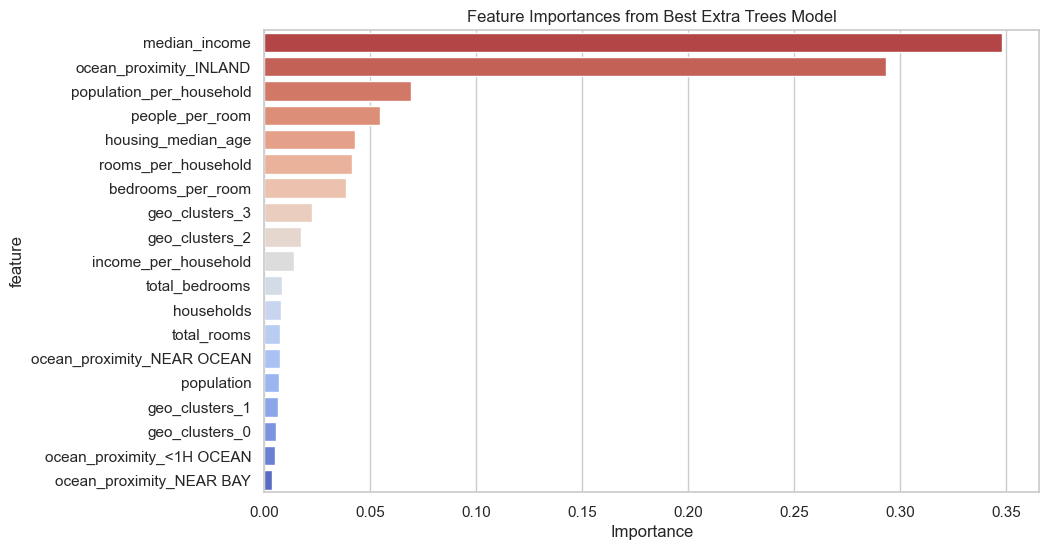

In [1020]:

plt.figure(figsize=(10,6))
sns.barplot(data=df_importance, y='feature', x='importance', palette='coolwarm')
plt.title('Feature Importances from Best Extra Trees Model')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

In [1021]:
import shap

In [1022]:
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_iter_robs',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer()),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['total_rooms', 'population',
                                                   'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'total_bedrooms',
                                                   'bedrooms_per_room',
                                                   'population_per_household',
                                                   'people_per_room',
                                                   'income_per_household']),
                                                 ('standard', StandardScaler(),
                                                  ['housing_median_age']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['ocean_proximity',
                                                   'geo_clusters'])])),
                ('modeling',
                 ExtraTreesRegressor(criterion='poisson', max_depth=20,
                                     min_samples_split=12, n_estimators=190,
                                     random_state=100))])

In [1023]:
# ambil model dan data dari pipeline
my_model = final_model[-1]
my_data = final_model[0].transform(X_train)

# define explainer
explainer_shap = shap.TreeExplainer(
    model= my_model,
    data= my_data
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer_shap.shap_values(my_data)

100%|===================| 11542/11553 [12:14<00:00]        

In [1024]:
feat_robust = list(final_model['preprocessing'].transformers_[0][1].get_feature_names_out())
feat_standard = list(final_model['preprocessing'].transformers_[1][1].get_feature_names_out())
feat_onehot = list(list(final_model['preprocessing'].transformers_[2][1].get_feature_names_out()))

feat = feat_robust + feat_standard + feat_onehot
feat

['total_rooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'total_bedrooms',
 'bedrooms_per_room',
 'population_per_household',
 'people_per_room',
 'income_per_household',
 'housing_median_age',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 'geo_clusters_0',
 'geo_clusters_1',
 'geo_clusters_2',
 'geo_clusters_3']

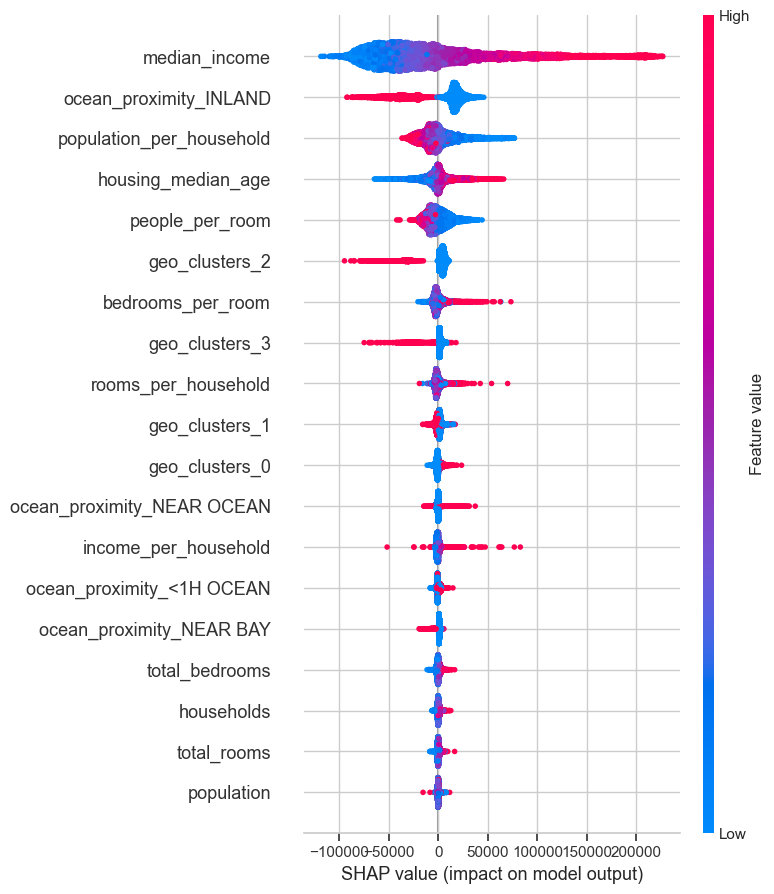

In [1025]:
shap.summary_plot(shap_values, my_data, feature_names=feat)

**The SHAP summary plot highlights which features most significantly impact the model's prediction of house prices:**

median_income:
- This is the most influential feature.
- Areas with higher median income (shown in red) tend to have higher predicted house prices.
- Conversely, lower income levels (blue) are associated with lower price predictions.

ocean_proximity_INLAND:
- Properties located far from the ocean (INLAND) generally lead to lower price predictions.
- This indicates that geographic location plays a major role in determining house value.

population_per_household:
- Higher population per household tends to lower the predicted house price.
- This may reflect overcrowding or smaller living spaces.

housing_median_age:
- The median age of housing has a moderate influence.
- Depending on context, both older and newer buildings can affect price predictions differently.

people_per_room & bedrooms_per_room:
- These features represent room density.
- High values often reduce house price predictions, likely due to decreased comfort or space.

geo_clusters (0–3):
- These indicate regional groupings based on location.
- Some clusters positively or negatively impact price, reinforcing that location is a critical factor beyond just distance from the ocean.

In [1026]:
shap.initjs()

In [1027]:
X_test.iloc[[1]] # Put one data for testing ML using shap

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedrooms_per_room,rooms_per_household,population_per_household,people_per_room,income_per_household,geo_clusters
6973,18.0,1619.0,346.0,904.0,295.0,2.1625,<1H OCEAN,0.213712,5.488136,3.064407,0.558369,0.007331,2


In [1028]:
y_test.iloc[[1]]

6973    77200.0
Name: median_house_value, dtype: float64

In [1029]:
def shap_plot(index, model, dataframe):

    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(dataframe)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[index], dataframe.iloc[[index]])

    return(p)

In [1030]:
preprocessor = final_model[0]
model_only = final_model[-1]

In [1031]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=feat)

In [1032]:
prediksi = final_model.predict(X_test.iloc[[1]])
prediksi

array([83965.68009038])

In [1036]:
print(f"The model predicts the price of this house/property to be: {prediksi} -> tolerance margin (±38,022) and range of realistis price {(prediksi - 38022)} - {(prediksi + 38022)}")

shap_plot(
    index= 1,
    model= model_only,
    dataframe= X_test_df
)

The model predicts the price of this house/property to be: [83965.68009038] -> tolerance margin (±38,022) and range of realistis price [45943.68009038] - [121987.68009038]


- The model predicts that the price of this house/property (index = 1) is approximately $83,965. 

- This SHAP plot explains which features most influenced that prediction. Features shown in red increased the predicted price, while those in blue decreased it. 

- In this case, the most significant factor lowering the predicted value is the low median income of the area, which strongly pulls the price down. Other factors such as population per household, bedrooms per room, and rooms per household also contribute to the lower price. Overall, the plot shows that this house is predicted to be less valuable mainly due to socioeconomic and housing density characteristics.

## **9. Conclusion & Recommendation**

### **Conclusion**

This project successfully developed a regression model to predict California housing prices using 1990 census data. The model utilized features such as median income, house age, number of rooms, ocean proximity, and population density to estimate the median house value.

After tuning, the model showed a slight performance improvement:

- RMSE decreased from 56,196 to 55,389, or approximately 26.80% of the average house price.

- MAE improved from 38,590 to 38,022, which equals about 18.37% of the average house value ($206,807).

- MAPE also improved from 22.17% to 21.85%.

This indicates that the model can predict house prices with a typical error of ±$38,000, and in more extreme cases, up to ±$55,000. For example, for a home worth $200,000, the model estimates the price between $161,978 to $238,022 (MAE range), and in broader bounds $144,611 to $255,389 (RMSE range). Given the dataset's price range ($15,000 to $500,000), this error is acceptable for real estate modeling, which naturally involves high variance.

### **Implementable Recommendations for the company**

#### 1. Set a Prediction Tolerance Margin Based on MAE
- Based on the model’s MAE of ±$38,022, the company should set a price tolerance margin when estimating or negotiating house prices.
- **Example**:  
  A property predicted at $200,000 should be interpreted as:  
  $200,000 ± $38,022 → range between $161,978 and $238,022
- **Implementation**: Apply this margin in internal pricing, negotiation strategies, and ROI projections.

---

#### 2. Avoid High-Risk Pricing Decisions Beyond RMSE Limits
- RMSE value of ±$55,429 indicates the maximum potential prediction error.
- **Example**:  
  A house estimated at $250,000 may realistically fall within:  
  $250,000 ± $55,389 → range between $194,611 and $305,389
- **Implementation**: Flag predictions with high uncertainty for manual review or additional validation.

---

#### 3. Focus Property Sourcing in High-Predictability Areas
- Use feature importance results to select areas with stable `median_income`, moderate `population`, and balanced `housing_median_age`.
- **Implementation**: Filter target regions with stable socioeconomic indicators to increase model reliability.

---

#### 4. Introduce a Confidence Scoring System for Each Prediction
- Categorize predictions based on model’s error metrics:
  - **High Confidence**: ±\$0 – \$30,000  
  - **Medium Confidence**: ±\$30,001 – \$50,000  
  - **Low Confidence**: > ±\$50,000
- **Implementation**: Display this confidence level in decision dashboards for internal teams.

---

#### 5. Automate Price Validation Workflow Using Model Output
- Build logic based on MAE/RMSE thresholds to decide:
  - If within margin → proceed
  - If beyond margin → review manually
- **Implementation**: Integrate this into CRM or deal approval systems.

---

#### 6. Improve Future Prediction Accuracy via Continuous Model Training
- Retrain the model regularly with updated market data to adapt to changing trends.
- **Implementation**: Schedule automatic model retraining every 3–6 months.

---

#### 7. Bundle Error Range into Customer Pricing Strategy
- Present predicted prices as a range to reduce disputes and better manage customer expectations.
- **Example**:
  > “Our model estimates this property between \$210,000 and \$250,000.”
- **Implementation**: Train sales and support teams to communicate prices using model-based intervals.

---


## **10. Save Model**

In [1034]:
import pickle

In [1035]:
# Save Model

model_extree = random_extree.best_estimator_

model_extree.fit(X=X, y=y)

pickle.dump(model_extree, open('model_extree.sav', 'wb'))